# Tempo typology

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from diptest import diptest

from helpers import cm2inch, title
matplotlib.style.use('styles.mplstyle')

import warnings
warnings.filterwarnings("ignore", category=Warning)

# Directory where all figures from this notebook are stored
FIG_DIR = '../figures/tempo-typology'
SAVE_FIG = True

In [2]:
dfs = dict(
    maidu = pd.read_csv('densmore-metadata/maidu.csv'),
    menominee = pd.read_csv('densmore-metadata/menominee.csv'),
    choctaw = pd.read_csv('densmore-metadata/choctaw.csv'),
    nootka = pd.read_csv('densmore-metadata/nootka.csv'),
    ute = pd.read_csv('densmore-metadata/ute.csv'),
)

In [3]:
# Collect all tempi in all cultures
tempi = []
for culture, df in dfs.items():
    col = 'bpm_voice' if 'bpm_voice' in df.columns else 'bpm'
    single_value = df[col].str.contains("\|") == False
    not_null = df[col].isna() == False
    bpm = df[single_value & not_null][col].astype(int)
    tempi.extend([(culture, t) for t in bpm])

tempi = pd.DataFrame(tempi, columns=['culture', 'bpm'])

In [4]:
maidu_tempi = tempi.query("culture=='maidu'").bpm
nootka_tempi = tempi.query("culture=='nootka'").bpm

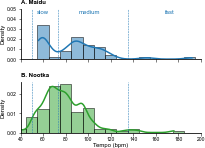

In [5]:
fig, (ax1, ax2) = plt.subplots(2, figsize=cm2inch(8, 6), tight_layout=True, sharex=True)
dist_props = dict(binrange=(35, 255), binwidth=10, lw=.5, kde=True, stat='density', kde_kws=dict(bw_adjust=.5))

def maidu_categories(ax):
    ax.axvline(50, c='C0', ls='--', lw=.5)
    ax.axvline(73, c='C0', ls='--', lw=.5)
    ax.axvline(135, c='C0', ls='--', lw=.5)

title('A. Maidu', ax=ax1)
sns.histplot(maidu_tempi, ax=ax1, **dist_props)
plt.xlim(40, 200)
ax1.set_ylim(0, 0.05)
ax1.set_xlabel('')
maidu_categories(ax1)
textprops = dict(
    xycoords='axes fraction', 
    xytext=(0, -5), textcoords='offset points',
    color='C0', fontsize=6
)
ax1.annotate('slow', (.09, 1), **textprops)
ax1.annotate('medium', (.32, 1), **textprops)
ax1.annotate('fast', (.8, 1), **textprops)

plt.sca(ax2)
title('B. Nootka')
sns.histplot(nootka_tempi, color='C2', ax=ax2, **dist_props)
maidu_categories(ax2)
plt.xlabel('Tempo (bpm)')

if SAVE_FIG: plt.savefig(f'{FIG_DIR}/tempo-distributions-raw.pdf')

In [6]:
dip, pval = diptest(maidu_tempi)
pval

0.0002466694967327987

In [7]:
dip, pval = diptest(nootka_tempi)
pval

0.07731230705092729